# Work on new gas price variable, using two weeks of data
two weeks: (08/25/23-09/07/23), code reference date: 11/11/23
### Separately created master_finalized_txns_limited.csv 
### from master_finalized_txns.csv.gz (which Tara created)
(status in (confirmed, failed))
### Calculate newgasprice
### Generate summary statistics, histogram for newgasprice


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import datetime
import scipy

import gzip

In [2]:
from pathlib import Path

# Data folder location
#### ADD PATH HERE ###

#read in TWO WEEK, trimmed and finalized, LIMITED mempool data set

limited_df = data_folder/'master_finalized_txns_limited.csv'
df = pd.read_csv(limited_df)


df = df.loc[: , ['basefeepergas', 'maxpriorityfeepergas', 'maxfeepergas', 'timepending']]
df.shape



(10505807, 4)

In [ ]:
#df.head()

In [3]:
del limited_df
#del df3
#del df9
#del df10

## Calculate newgasprice

In [4]:
#Calculate gasprice variable
#df["maxpriorityfeepergas"].describe()
#df["basefeepergas"].describe()
#df["maxfeepergas"].describe()

df['mybid'] = df['basefeepergas'] + df['maxpriorityfeepergas']

df['newgasprice'] = df[['mybid','maxfeepergas']].values.min(axis=1)

df.shape

(10505807, 6)

In [5]:
df['mybid'].describe()

count    1.050581e+07
mean     2.105507e+10
std      1.972518e+10
min      8.020358e+09
25%      1.254281e+10
50%      1.640310e+10
75%      2.439216e+10
max      2.001814e+13
Name: mybid, dtype: float64

In [6]:
df['newgasprice'].describe()

count    1.050581e+07
mean     2.039117e+10
std      1.880693e+10
min      8.020358e+09
25%      1.245359e+10
50%      1.610151e+10
75%      2.348827e+10
max      2.000050e+13
Name: newgasprice, dtype: float64

In [ ]:
#Visual check that new gas price is calculated correctly (print 20 rows)

#df.iloc[1:20, :]


In [ ]:
#some examples where the maxfeepergas determined the new gas price
#df[df['maxfeepergas']==df['newgasprice']].iloc[1:10, : ]


In [ ]:
#some examples where the base fee and tip determined the new gas price
#df2[df2['maxfeepergas']!=df2['newgasprice']].iloc[1:10, :]
#df2[df2['maxfeepergas']!=df2['newgasprice']].iloc[1:10, [21,19,27,20,28]]

In [7]:
df['newgasprice'].describe()

count    1.050581e+07
mean     2.039117e+10
std      1.880693e+10
min      8.020358e+09
25%      1.245359e+10
50%      1.610151e+10
75%      2.348827e+10
max      2.000050e+13
Name: newgasprice, dtype: float64

In [8]:
#Convert newgasprice to gwei/gas
#   basefeepergas, maxpriorityfeepergas, and maxfeepergas are "denominated in wei"
#   according to updated blocknative schema
#   We assume this means that the units for these variables, and newgasprice calculated from these variables
#        is actually wei/gas, 
#        so to convert from wei/gas to gwei/gas, we divide by 10^9
df['newgasprice_'] = df['newgasprice']/(10**9)
df['newgasprice_'].describe()

count    1.050581e+07
mean     2.039117e+01
std      1.880693e+01
min      8.020358e+00
25%      1.245359e+01
50%      1.610151e+01
75%      2.348827e+01
max      2.000050e+04
Name: newgasprice_, dtype: float64

In [9]:
#find 99th percentile for newgasprice_
#(NOTE: percentile function was not working before with timepending: rows with missing timepending had not been removed)
#np.nanpercentile(df3['timepending'], 99)

x = np.percentile(df['newgasprice_'], 99)
x

69.803846911

In [ ]:
#some examples where newgasprice_ > 120
#df[df['newgasprice_'] > 120].iloc[1:10, [21,19,27,20,28,29]]
#df[df['newgasprice_'] > 120].iloc[1:10, :]

In [10]:
#del df10
df10  = df[df['newgasprice_']<x]
#df10['newgasprice_'].describe()

## Gas Price Plot and summary statistics

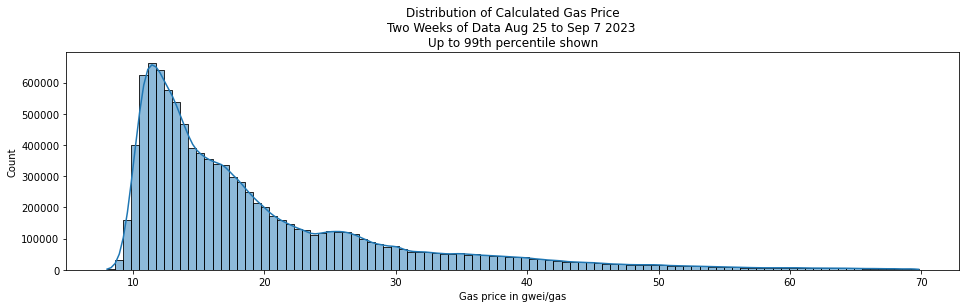

In [12]:
#Plot of calculated gas price that does not include the top 1%
plt.figure(figsize=(16,4))
sns.histplot(df10['newgasprice_'], bins=100, kde=True, edgecolor = 'black')
plt.title('Distribution of Calculated Gas Price\nTwo Weeks of Data Aug 25 to Sep 7 2023 \nUp to 99th percentile shown')
plt.xlabel('Gas price in gwei/gas')
plt.show()

In [13]:
#NOTE: df has all finalized rows from the trimmed two week data set (appropriate for summary statistics), 
#     d10 excludes the top 1% of newgasprice values (for the histogram only)
df['newgasprice_'].describe()

count    1.050581e+07
mean     2.039117e+01
std      1.880693e+01
min      8.020358e+00
25%      1.245359e+01
50%      1.610151e+01
75%      2.348827e+01
max      2.000050e+04
Name: newgasprice_, dtype: float64